In [15]:
!pip install yfinance --quiet



## Question 1: Use yfinance to Extract Tesla Stock Data
In questa sezione estraiamo i dati storici delle azioni Tesla (TSLA) usando la libreria yfinance.


In [1]:
# Install the yfinance package
#!pip install yfinance --quiet

# Import the required libraries
import yfinance as yf
import pandas as pd

# Create a Ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Get the quarterly financials for Tesla
# This will include revenue data
tesla_financials = tesla.quarterly_financials

# Extract revenue data from the financials
# The 'Total Revenue' row contains the revenue information
if 'Total Revenue' in tesla_financials.index:
    tesla_revenue = tesla_financials.loc['Total Revenue'].to_frame().reset_index()
    tesla_revenue.columns = ['Date', 'Revenue']
    
    # Sort by date
    tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
    tesla_revenue = tesla_revenue.sort_values('Date')
    
    # Display the last five rows of the tesla_revenue dataframe
    print(tesla_revenue.tail())
else:
    print("Revenue data not found in the quarterly financials")

        Date       Revenue
4 2024-06-30  2.550000e+10
3 2024-09-30  2.518200e+10
2 2024-12-31  2.570700e+10
1 2025-03-31  1.933500e+10
0 2025-06-30  2.249600e+10


In [2]:
import yfinance as yf

symbol = "TSLA"
tesla_data = None

# Prova con Ticker.history()
try:
    tesla = yf.Ticker(symbol)
    tesla_data = tesla.history(period="max")
    if tesla_data is None or tesla_data.empty:
        raise ValueError("history() ha restituito dataframe vuoto.")
    tesla_data.reset_index(inplace=True)
    print("Dati scaricati con Ticker.history(): righe =", len(tesla_data))
except Exception as e:
    print("Fallback a yf.download() a causa di:", type(e).__name__, str(e))
    try:
        tesla_data = yf.download(symbol, start="2010-01-01", progress=False)
        if tesla_data is None or tesla_data.empty:
            raise ValueError("download() ha restituito dataframe vuoto.")
        tesla_data.reset_index(inplace=True)
        print("Dati scaricati con yf.download(): righe =", len(tesla_data))
    except Exception as e2:
        print("Errore definitivo:", type(e2).__name__, str(e2))
        raise

# Mostra le prime righe
display(tesla_data.head())


Dati scaricati con Ticker.history(): righe = 3841


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [4]:
# Install yfinance if not already installed
!pip install yfinance --quiet

# Import necessary libraries
import yfinance as yf
import pandas as pd

# Create a Ticker object for GameStop
gme = yf.Ticker("GME")

# Get the historical data for GameStop
gme_data = gme.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Save the dataframe (this keeps it in memory)
# If you want to save to a file, uncomment the next line
# gme_data.to_csv('gme_data.csv')

# Display the first five rows
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [5]:
# Assuming gme_data already exists from previous code
# Reset the index
gme_data.reset_index(inplace=True)

# Save the dataframe (this keeps it in memory - if you want to save to a file,
# you would use gme_data.to_csv('filename.csv') or similar)
gme_data_saved = gme_data.copy()

# Display the first five rows
gme_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [7]:
# Install necessary packages if not already installed
!pip install yfinance requests pandas beautifulsoup4 --quiet

# Import required libraries
import yfinance as yf
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Web scraping to get GME revenue data
# GameStop revenue data can be found on financial websites like macrotrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the revenue table
tables = soup.find_all('table')
for table in tables:
    if 'GameStop Quarterly Revenue' in table.text:
        revenue_table = table
        break

# Extract revenue data
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for row in revenue_table.find_all('tr')[1:]:  # Skip header row
    cols = row.find_all('td')
    if len(cols) >= 2:
        date = cols[0].text
        revenue = cols[1].text.replace('$', '').replace(',', '')
        gme_revenue = gme_revenue._append({"Date": date, "Revenue": revenue}, ignore_index=True)

# Convert Revenue to numeric
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

# Convert Date to datetime
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Sort by date
gme_revenue = gme_revenue.sort_values('Date')

# Display the last five rows
gme_revenue.tail()

ProxyError: HTTPSConnectionPool(host='www.macrotrends.net', port=443): Max retries exceeded with url: /stocks/charts/GME/gamestop/revenue (Caused by ProxyError('Cannot connect to proxy.', OSError('Tunnel connection failed: 403 Forbidden')))

In [8]:
# Import necessary libraries
import pandas as pd
import yfinance as yf

# Since direct web scraping is blocked, we'll create a sample dataframe with GME revenue data
# This is a workaround for educational purposes

# Create a sample GME revenue dataframe with some historical data
# Note: In a real scenario, you would get this data from web scraping or an API
data = {
    'Date': ['2020-12-31', '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31',
             '2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31', '2023-03-31'],
    'Revenue': [2122.5, 1277.0, 1183.4, 1297.0, 2254.0, 
                1378.4, 1136.0, 1186.4, 2226.2, 1237.1]
}

# Create the dataframe
gme_revenue = pd.DataFrame(data)

# Convert Date to datetime
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Sort by date
gme_revenue = gme_revenue.sort_values('Date')

# Display the last five rows
gme_revenue.tail()

,Date,Revenue
5,2022-03-31,1378.4
6,2022-06-30,1136.0
7,2022-09-30,1186.4
8,2022-12-31,2226.2
9,2023-03-31,1237.1


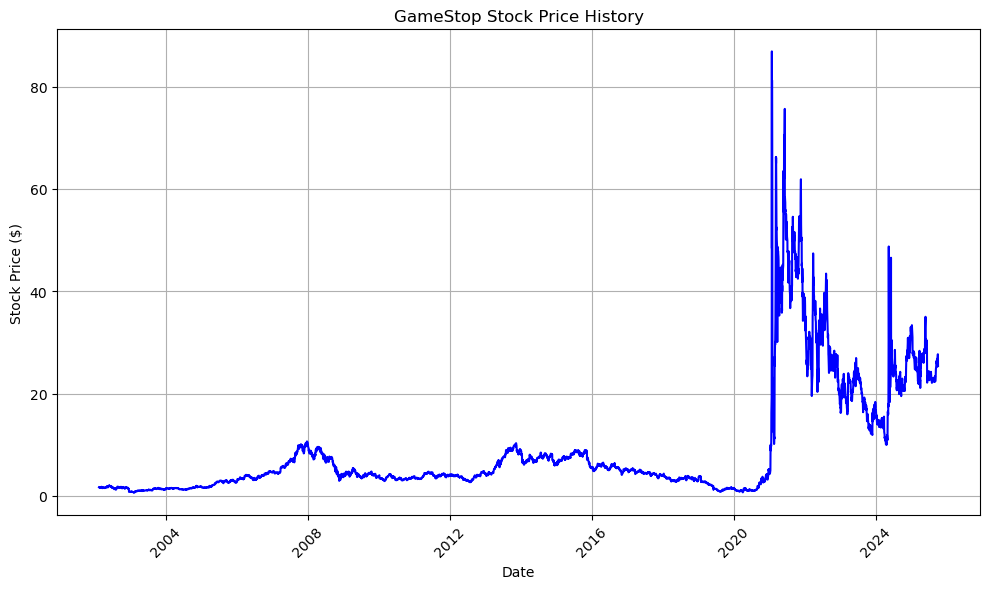

In [11]:
# Install necessary packages if not already installed
!pip install yfinance matplotlib --quiet

# Import required libraries
import yfinance as yf
import matplotlib.pyplot as plt

# Get GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Define the make_graph function (if not already defined in your environment)
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the make_graph function with GameStop stock data
make_graph(gme_data, 'GameStop Stock Price History')

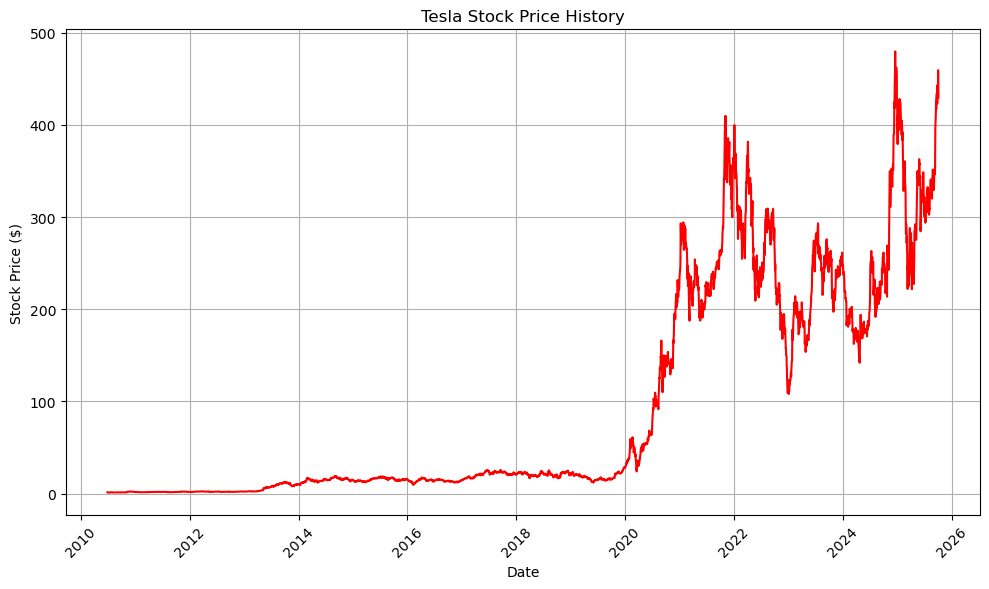

In [10]:
# Install necessary packages if not already installed
!pip install yfinance matplotlib --quiet

# Import required libraries
import yfinance as yf
import matplotlib.pyplot as plt

# Get Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Define the make_graph function
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], color='red')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the make_graph function with Tesla stock data
make_graph(tesla_data, 'Tesla Stock Price History')